In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_dir = '../runs/model_div1'
env_name = "WallEnv"
model_divs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and 'model_div' in d]

runs = []
for model_div in model_divs:
    runs.extend([os.path.join(model_div, d) for d in os.listdir(model_div) if os.path.isdir(os.path.join(model_div, d))])

results_paths = [os.path.join(d, "results.csv") for d in runs if os.path.exists(os.path.join(d, 'results.csv'))]
results_paths = [result for result in results_paths if env_name in result]


In [3]:
# Initialize a list to hold the data from each CSV
data_list = []

# Loop through each results file, load it, and store it along with the total parameters
for result_path in results_paths:
    df = pd.read_csv(result_path)
    # Assume the first row's total parameters value is representative for all rows in the CSV
    total_parameters = df['# Total Parameters'].iloc[0] if '# Total Parameters' in df.columns else None
    data_list.append((df, total_parameters))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


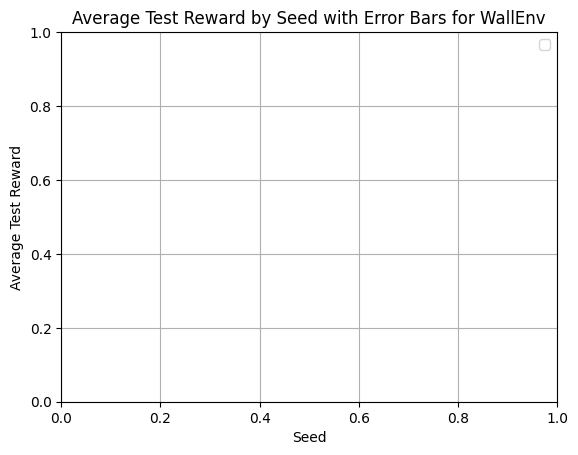

In [4]:
# Create a color map based on the unique total parameters
unique_params = list(set([data[1] for data in data_list]))
color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_params)))

# Plot each set of data with its associated color
for (df, total_parameters), color in zip(data_list, color_map):
    plt.errorbar(df['Seed'], df['Average Test Reward'], yerr=df['Test Reward Variance'], fmt='-o', capsize=5, label=f'Params: {total_parameters}', color=color)

plt.title(f'Average Test Reward by Seed with Error Bars for {env_name}')
plt.xlabel('Seed')
plt.ylabel('Average Test Reward')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_985709/467601789.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
import glob

# Pattern to recursively match CSV files in subdirectories of each model_div*
csv_pattern = '../runs/model_div[1-5]/**/*csv'

# Use glob with recursive flag set to True
csv_files = glob.glob(csv_pattern, recursive=True)

csv_files

for csv_file in csv_files:
    print(csv_file)  # or process each CSV file as needed

../runs/model_div2/MineFieldEnv-v0__minigrid-test-ppo__1__1710406127/results.csv
../runs/model_div2/WallEnv-v0__minigrid-test-ppo__1__1710405989/results.csv
../runs/model_div2/WallEnv-v0__minigrid-test-ppo__1__1710314545/results.csv
../runs/model_div2/WallEnv-v0__minigrid-test-ppo__1__1710405957/results.csv
../runs/model_div1/MineFieldEnv-v0__minigrid-test-ppo__1__1710405604/results.csv
../runs/model_div1/WallEnv-v0__minigrid-test-ppo__1__1710405590/results.csv
../runs/model_div1/WallEnv-v0__minigrid-test-ppo__1__1710314511/results.csv
../runs/model_div1/WallEnv-v0__minigrid-test-ppo__1__1710405582/results.csv
../runs/model_div4/WallEnv-v0__minigrid-test-ppo__1__1710406326/results.csv
../runs/model_div4/MineFieldEnv-v0__minigrid-test-ppo__1__1710406549/results.csv
../runs/model_div4/WallEnv-v0__minigrid-test-ppo__1__1710314710/results.csv
../runs/model_div4/WallEnv-v0__minigrid-test-ppo__1__1710406318/results.csv
../runs/model_div3/WallEnv-v0__minigrid-test-ppo__1__1710406196/results.c

In [10]:
# Initialize a list to hold the data from each CSV
data_list = []

# Loop through each results file, load it, and store it along with the total parameters
for result_path in csv_files:
    df = pd.read_csv(result_path)
    # Assume the first row's total parameters value is representative for all rows in the CSV
    total_parameters = df['# Total Parameters'].iloc[0] if '# Total Parameters' in df.columns else None
    data_list.append((df, total_parameters))


NameError: name 'env_name' is not defined

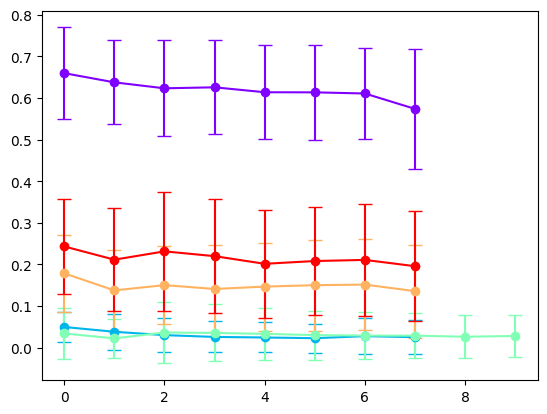

In [12]:
# Create a color map based on the unique total parameters
unique_params = list(set([data[1] for data in data_list]))
color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_params)))

# Plot each set of data with its associated color
for (df, total_parameters), color in zip(data_list, color_map):
    plt.errorbar(df['Seed'], df['Average Test Reward'], yerr=df['Test Reward Variance'], fmt='-o', capsize=5, label=f'Params: {total_parameters}', color=color)

plt.title(f'Average Test Reward by Seed with Error Bars for {env_name}')
plt.xlabel('Seed')
plt.ylabel('Average Test Reward')
plt.grid(True)
plt.legend()
plt.show()
